# Induction Braking: System of the Future or Impossibility?
Names: Owen Blanchard, Jacob Swift, John Florence
uniqname: oblanch, jtflo, jgswift

# Abrstract
Some mechanisms today utilize a physical phenomenon called induction braking to slow/stop the rotation of a 
metallic wheel while simultaneously harvesting the rotational energy held by said wheel. A variation of induction 
(also called eddy current) braking is used in some trains as a means of converting kinetic energy into electrical/heat energy without damaging brake pads. Induction breaking works by fixing a conducting metal disc to your wheel and placing a horseshoe-shaped electromagnet around the disc. A powerful magnetic field created by the electromagnet induces eddy currents in the conducting disc, creating a magnetic force which opposes the direction of motion. 

While Induction Braking has many potential advantages over traditional friction-based braking, there are a few important disadvantages that make it infeasible (at this time) for consumer vehicles. The primary issue is the amount of energy required to produce a magnetic field great enough to stop quickly is far greater than a car battery is capable. Furthermore, as induction brakes engage to slow a vehicle, the force with which they slow that vehicle is asymptotically approaching zero, meaning without some extra mechanism to fully stop, you would keep rolling slower and slower forever.



## Experimental Background
We set out to determine whether induction braking is a feasible alternative to friction braking in a normal car. To do so we needed to answer a number of questions. Our primary question was, “Can induction braking be feasible in consumer vehicles?”, but we also had to ask: What materials should we use? How quickly must our car be able to stop? If we can’t stop, what speed is slow enough to be considered “safely stopped”? How large would the magnetic field producing eddy currents have to be? Is induction braking energy-efficient? etc.  
	
A number of these questions could be answered by simply assigning an arbitrary value. For example, we decided for our car to be considered “safely stopped”, its velocity must be below $\frac{1}{2}$ of a mile per hour ($\frac{1}{4}$ m/s). Other questions, however, required a great deal of online research and estimation, for example: which materials should we use? This question required a lot of guesswork because we needed a material that fulfilled a number of characteristics: it needed to be conductive, have a high melting point, not deform easily, and must be readily available.
We set out to determine whether induction braking has feasible applications in modern cars, by answering the questions laid out above using an iPython simulation we will be able to make an educated claim as to whether or not induction braking is plausible.

In order to answer our question “Can induction braking be used in consumer vehicles” we decided to set up a loop of code that will take our given values and put them through a series of relationships until the values that we are looking for are returned (those values being power, velocity, and acceleration). In this process, we used the following equations:

$1$) Area Enclosed: $$A = \frac{1}{2}\pi r^{2}$$

$2$) Time Rate of Change of Area Enclosed: $$\frac{dA}{dt} = \frac{fA}{\pi}$$

$3$) Magnetic Flux: $${\Phi}_{B} = \oint{B \cdot dA} = BA$$

$4$) Time Rate of Change of ${\Phi}_{B}$: $$\frac{d{\Phi}_{B}}{dt} = B\frac{dA}{dt}$$

$5$) Faraday’s Law: $$\epsilon = -\frac{d{\Phi}_{B}}{dt}$$

$6$) Ohm’s Law: $${I}_{induced} = \frac{\epsilon}{R}$$

$7$) Power: $$P = I^{2} R$$

$8$) Torque: $$\tau = \frac{P}{f}$$

$9$) Angular Acceleration ($I$ = moment of intertia): $$\alpha = \frac{\tau}{I}$$

$10$) Frequency: $$\omega = \int{\alpha dt}$$



In [9]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [10]:
mu0 = 4*np.pi*1e-7

# Here we define all of the characteristics of the conducting disc that are important for our calculations
# our disc is made of copper


# Intrinsic quantities of our disc
radius = .25 # radius of our disc (meters)
thickness = .03 # thickness of our disc (meters)
density = 8960 # density of our disc (kg/M^3)
resistivity = 1.68e-8 # resistivity of copper

# Derived quantities of our disc
area = np.pi*radius**2 # Area of one side (M^2)
volume = (np.pi)*(radius**2)*(thickness) # volume of our disc (M^3)
mass = volume*density # mass of our disc (kg)
mI = (.5)*(mass)*(radius**2) # moment of inertia of our disc
resistance = (resistivity*((np.pi*radius) + (2*radius)))/(thickness**2) # estimated total resistance of current path

# Quantities to set the disc in motion
frequency = 100 # frequency of revolution of our disc in (rad/s)
translational_velocity = frequency*radius #velocity of our disc if it were set on the ground to roll

# Quantites related to the braking apparatus
B_field = .5 # magnitude of the B-field through our disc (T)
area_in_B_field = (np.pi)*(radius**2)*(.5) #the surface area of the 1/2 of the disc inside the B-field




print("INTRINSIC")
print("Radius:", radius, "m")
print("Thickness:", thickness, "m")
print("Density:", density, "kg/m^3")
print()
print("DERIVED")
print("Area:", area, "M^2")
print("Volume:", volume, "m^3")
print("Mass:", mass, "kg")
print("Moment of Inertia:", mI)
print("Resistance of disc:", resistance,"Ohms")
print()
print("MOTION")
print("frequency in revolutions per second:", frequency,"rad/s")
print("Translations velocity:", translational_velocity,"M/S")
print()
print("BRAKING")
print("Magnetic field strength:", B_field, "T")
print("Disc area affected by B field:", area_in_B_field,"M^2")

INTRINSIC
Radius: 0.25 m
Thickness: 0.03 m
Density: 8960 kg/m^3

DERIVED
Area: 0.19634954084936207 M^2
Volume: 0.005890486225480862 m^3
Mass: 52.778756580308524 kg
Moment of Inertia: 1.6493361431346414
Resistance of disc: 2.3994099050085704e-05 Ohms

MOTION
frequency in revolutions per second: 100 rad/s
Translations velocity: 25.0 M/S

BRAKING
Magnetic field strength: 0.5 T
Disc area affected by B field: 0.09817477042468103 M^2


In [11]:
# Here we will define the function that allows us to calculate 
# the torque on a disc due to the induced eddy currents. 

def calc_torque_from_flux(b_field, frequency, area_in_b_field, resistance):
    
    delta_area = (1/(2*np.pi))*(2)*frequency*area_in_b_field #rate of change of area in B-field
    
    delta_flux = b_field*delta_area # rate of change of flux 
    
    induced_current = -delta_flux/resistance # induced current in the conductive disc
    
    power = (induced_current**2)*(resistance) # Power generated by the eddy currents in the disc
    
    torque = power/(frequency*np.pi*2) # Torque experienced by the disc from eddy current forces
    
    return torque

torque = calc_torque_from_flux(B_field,frequency,area_in_B_field,resistance)
acceleration = torque/mI

In [12]:
# Here we initialize all of the arrays where we store values 
# as well as the time-related variables needed for a loop

t = 3 # the number of seconds that will elapse during each braking simulation
dt = 1e-4 # time increments

x = np.arange(0,t,dt) # This array acts as the x-axis (time axis) for our plots


stored_energy=np.zeros(np.shape(x)) # array for the rotational kinetic energy stored by the disc over time
frequency_array = np.zeros(np.shape(x))# array for the freqnency of the disc's rotation over time
acceleration_array = np.zeros(np.shape(x))# array for the angular acceleration of the disc over time
velocity_array = np.zeros(np.shape(x))# array for the translational velocity of the disc over time
speed_array = np.zeros(np.shape(x))

initial velocity: 31.25 m/s
Road speed: 69.90625 mph
final speed 3.6746962650321784 mph


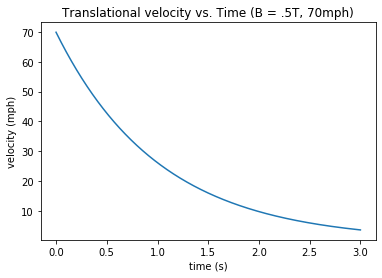

In [13]:
# Here we execute a loop to simulate eddy current braking at 4 different initial speeds

#125 rad/s = 70mph
#99 rad/s = 55mph
#63 rad/s = 35mph
#36 rad/s = 20mph

frequency = 125
translational_velocity = frequency*radius
speed = translational_velocity*2.237

print("initial velocity:", translational_velocity, "m/s")
print("Road speed:", speed, "mph")


for n,time in enumerate (x):
    
    frequency = frequency - acceleration*dt
    torque = calc_torque_from_flux(B_field,frequency,area_in_B_field,resistance)
    acceleration = torque/mI

    acceleration_array[n] = acceleration
    frequency_array[n] = frequency
    stored_energy[n] = .5*mI*frequency**2
    velocity_array[n] = radius*frequency
    speed_array[n] = velocity_array[n]*2.237
    

plt.plot(x,speed_array)
plt.ylabel("velocity (mph)")
plt.xlabel("time (s)")
plt.title("Translational velocity vs. Time (B = .5T, 70mph)")
print("final speed", speed_array[-1], "mph")

#plt.savefig("20mph.5.jpg")

## Explanation of our experimental setup

Our induction braking simulation is similar in construction to the RC circuit we simulated in Python Homework 5. The first task was to create a set of variables that modeled our conductive disc. Each quantity corresponds to a physical property; radius, thickness, density, etc. Next, we filled in the gaps by defining a new set of variables that depend on the intrinsic characteristics of our disc, things like mass, moment of inertia, and internal resistance. 

Once we had our disc (or at least a reliable mathematical model of one) the next task was to set it in motion. To do so we defined a new quantity called “frequency” that describes the angular frequency (in rad/s) at which our disc would be “rolling”. By changing the initial frequency value we are able to control the “speed” of our wheel to test different initial conditions and the effectiveness of induction braking at different speeds. 

Once we had defined a virtual wheel that rotated with an initial frequency, $\omega$, the next piece to incorporate was the actual electromagnetic braking system. We decided to set the magnetic field strength to three different values for three different trial groups, $0.1~T$, $0.25~T$, and $0.5~T$. The last quantity to define was the proportion of our conducting disc that was inside of the magnetic field at any given time. We decided that our electromagnet would cover 50% of the disc.

Using the mathematical relationships highlighted above we were able to take the intrinsic quantities associated with our setup (metal wheel spinning inside a uniform magnetic field) and calculate the rate of change of magnetic flux through the disc ($2,3$). By “rate of change of flux” we mean the area of the disc that moves through the uniform B-field each second. Dividing the negative of our calculated delta flux by the current path’s internal resistance we were able to arrive at the magnitude of the induced current inside our conductive disc ($5,6$). The value of induced current allows us to calculate the amount of power our simulated brakes produce ($7$) and in turn the net torque on our disc ($8$). Once we had found the formula to calculate the torque on a spinning disc in a magnetic field, we were able to create a function that takes in different variables and spits out the correct  torque. As with any translational force and mass, we were able to divide the torque on our wheel by its moment of inertia to find the angular acceleration our disc is experiencing at any given moment in time. 
	

We took this torque function and used it to create a for loop that first calculates the torque on the disc, second finds the acceleration, third updates the frequency using the current value of acceleration, and fourth and lastly stores the values of frequency, acceleration, rotational energy, and translational velocity. Our last step was using the arrays full of frequency, acceleration, energy, and velocity values to plot our data and display/analyze our results.

In [14]:
Image(filename="260projectgraphs.jpeg", width=1600,height=1600)

FileNotFoundError: [Errno 2] No such file or directory: '260projectgraphs.jpeg'

In [15]:
Image(filename="260projectTable.jpeg", width=1200,height=1600)

FileNotFoundError: [Errno 2] No such file or directory: '260projectTable.jpeg'

# Results

Our experiment suggests that using a 1T magnetic field in our brakes is feasable. A 0.5T magnetic field and a 0.25T magentic field simply don't have the stopping power to be safetly applied on the road. During the caclutation phase we ran into a problem when attempting too calculate the resistance of the breaking disk. In the end, we had to estimate our resistance to be $(resistivity*({\pi}*radius) + (2*radius)))/(thickness^{2})$. Another issue we ran into was deciding what material to choose for our brake assembly. Some conductive metals came too close to their melting points and others weren't conductive enough. We decided to use copper, as it is a common conductor that wouldn't melt under the stress of the battery. To ensure that the wire wouldn't melt, we made the wire have a larger radius. When we came to deciding the strenghts of our magnetic fields, we thought that a 1T field couldn't be effectively produced by a standard 350 V electric car battery. However, we came up with the idea of using a solenoid with thousands of coils to produce a 1T field. The results of our experiment represent the stopping capability of the breaks when they are completely applied (this is effectively one slamming on the brakes as hard as possible). Despite the brakes being 100% activated, the car would still attempt to roll away at low speeds because of the car's idle acceleration. A real-life application of these brakes would require the ability for them to progrerssively rolled on and off in addition to a small friction break to keep the car at rest. In terms of energy efficiency, the car would be terribly ineffiecient if the heat from the wire is not recovered. This is because the car would be putting energy into stopping and accelerating. However, if the car could capture the heat energy given off by the wires, the brakes would be very energy efficient because there would negligible mechanical friction.